Saving i1.jpg to i1.jpg


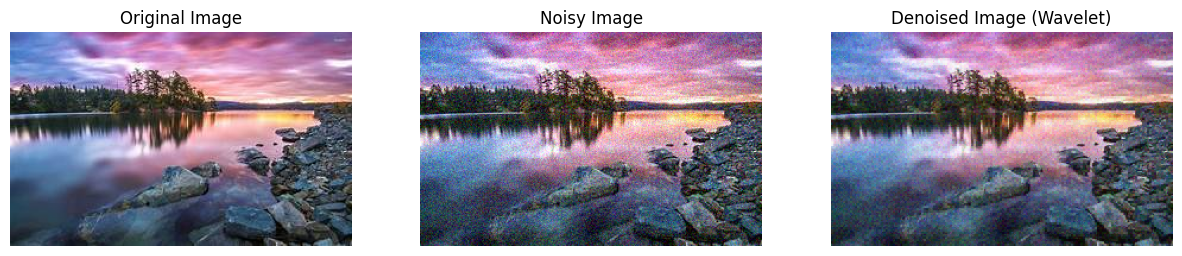

In [1]:
import cv2
import numpy as np
import pywt
import matplotlib.pyplot as plt
from google.colab import files

# Step 1: Upload image
uploaded = files.upload()
filename = list(uploaded.keys())[0]

# Step 2: Read uploaded image in color
img = cv2.imread(filename)   # BGR format
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB for matplotlib

# Step 3: Add Gaussian noise
noisy_img = img + 20 * np.random.randn(*img.shape)
noisy_img = np.clip(noisy_img, 0, 255).astype(np.uint8)

# Step 4: Function to denoise one channel using Wavelets
def wavelet_denoise(channel, wavelet='haar', thresh=20):
    coeffs2 = pywt.dwt2(channel, wavelet)
    cA, (cH, cV, cD) = coeffs2
    cH = pywt.threshold(cH, thresh, mode='soft')
    cV = pywt.threshold(cV, thresh, mode='soft')
    cD = pywt.threshold(cD, thresh, mode='soft')
    denoised = pywt.idwt2((cA, (cH, cV, cD)), wavelet)
    return np.clip(denoised, 0, 255)

# Step 5: Apply wavelet denoising to each color channel
channels = cv2.split(noisy_img)   # split R, G, B
denoised_channels = [wavelet_denoise(ch) for ch in channels]

# Merge back denoised channels
denoised_img = cv2.merge([ch.astype(np.uint8) for ch in denoised_channels])

# Step 6: Show results
plt.figure(figsize=(15,6))

plt.subplot(1,3,1)
plt.imshow(img)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(noisy_img)
plt.title("Noisy Image")
plt.axis("off")

plt.subplot(1,3,3)
plt.imshow(denoised_img)
plt.title("Denoised Image (Wavelet)")
plt.axis("off")

plt.show()
